In [3]:
# Import Libraries
import pandas as pd              
import matplotlib.pyplot as plt 

# Load Excel Data
df = pd.read_excel(
    io="bikes_data.xlsx"
)

# Check Information
df.info()                        
df.head(n=5)    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1387 non-null   int64  
 1   Month                  1387 non-null   object 
 2   Day of Week            1387 non-null   object 
 3   Hour                   1387 non-null   int64  
 4   Temperature            1387 non-null   float64
 5   Humidity               1387 non-null   int64  
 6   Wind Speed             1387 non-null   float64
 7   Visibility             1387 non-null   int64  
 8   Dew Point Temperature  1387 non-null   float64
 9   UV Index               1387 non-null   float64
 10  Rainfall               1387 non-null   float64
 11  Snowfall               1387 non-null   float64
 12  Season                 1387 non-null   object 
 13  Holiday                1387 non-null   object 
 14  RENTALS                1387 non-null   int64  
dtypes: f

,ID,Month,Day of Week,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Rainfall,Snowfall,Season,Holiday,RENTALS
0,1,Jan,Sunday,0,-3.2,40,0.5,1358,-14.9,0.00,0.0,0.0,Winter,Yes,221
1,2,Jan,Sunday,13,2.4,22,2.3,1921,-17.2,1.10,0.0,0.0,Winter,Yes,268
2,3,Jan,Sunday,16,3.0,28,2.5,1864,-13.7,0.51,0.0,0.0,Winter,Yes,335
3,4,Jan,Sunday,17,1.8,33,3.3,1913,-12.8,0.18,0.0,0.0,Winter,Yes,299
4,5,Jan,Sunday,20,-0.3,40,1.2,1936,-12.2,0.00,0.0,0.0,Winter,Yes,225


In [53]:
# Check missing values
missing_counts = df.isnull().sum()  
print("===Missing values per column===\n", missing_counts)

# Check basic statistics
numeric_summary = df.describe(include="all")
print("===Summary statistics===\n", numeric_summary)

===Missing values per column===
 ID                         0
Month                    252
Day of Week                0
Hour                       0
Temperature                0
Humidity                   0
Wind Speed                 0
Visibility                 0
Dew Point Temperature      0
UV Index                   0
Rainfall                   0
Snowfall                   0
Season                     0
Holiday                    0
RENTALS                    0
Is_Weekend                 0
rainfall_bin               2
dtype: int64
===Summary statistics===
                  ID Month Day of Week         Hour  Temperature     Humidity  \
count   1387.000000  1135        1387  1387.000000  1387.000000  1387.000000   
unique          NaN    10           7          NaN          NaN          NaN   
top             NaN   Oct    Thursday          NaN          NaN          NaN   
freq            NaN   128         216          NaN          NaN          NaN   
mean     694.000000   NaN         N

In [39]:
# Detect outliers

# Calculate quartiles
first_quartile  = df["RENTALS"].quantile(0.25)  # 25th percentile (lower quartile)
third_quartile  = df["RENTALS"].quantile(0.75)  # 75th percentile (upper quartile)
interquartile_range = third_quartile - first_quartile  # IQR: Range of the middle 50%

# Determine lower and upper bounds for outliers
lower_threshold = first_quartile  - 1.5 * interquartile_range
upper_threshold = third_quartile + 1.5 * interquartile_range

# Extract outliers
outlier_mask = (df["RENTALS"] < lower_threshold) | (df["RENTALS"] > upper_threshold)
outliers = df[outlier_mask]

# Check the result
print("Interquartile Range (IQR):", interquartile_range)
print("Lower Bound for Outliers:", lower_threshold)
print("Upper Bound for Outliers:", upper_threshold)
print("Number of Outliers Detected:", len(outliers))

# Display a sample of outlier values
outliers[["RENTALS", "Temperature", "Rainfall", "Humidity"]].head(10)


Interquartile Range (IQR): 946.0
Lower Bound for Outliers: -1168.5
Upper Bound for Outliers: 2615.5
Number of Outliers Detected: 27


,RENTALS,Temperature,Rainfall,Humidity
380,2642,14.8,0.0,24
437,3088,21.2,0.0,32
438,2806,17.4,0.0,45
487,2632,25.5,0.0,31
499,2972,17.9,0.0,37
508,2617,19.5,0.0,65
515,3061,27.5,0.0,47
594,3453,27.1,0.0,40
604,3640,26.2,0.0,54
605,3021,24.5,0.0,63


In [41]:
# Weekday Rentals Comparison (Original vs. Outliers Removed)

# Create a new DataFrame excluding outliers
trimmed_df = df[
    # Keep only records where RENTALS are within the lower and upper bounds
    (df["RENTALS"] >= lower_threshold) &
    (df["RENTALS"] <= upper_threshold)
]

# Calculate total rentals by weekday in the original data
original_weekday_totals = df.groupby(
    by="Day of Week"      # Group by weekday
)["RENTALS"].sum()        # Sum up RENTALS

# Calculate the same totals using the data without outliers
trimmed_weekday_totals = trimmed_df.groupby(
    by="Day of Week"      # Group by the same weekday column
)["RENTALS"].sum()        # Sum up RENTALS

# Create a comparison table
comparison_df = pd.DataFrame({
    "Original Totals": original_weekday_totals,
    "Trimmed Totals":  trimmed_weekday_totals
})

# Output comparison_df
print(comparison_df)


             Original Totals  Trimmed Totals
Day of Week                                 
Monday                177184          152693
Tuesday               158360          146655
Wednesday             144533          136175
Thursday              189656          171288
Friday                150528          147852
Saturday              145088          142471
Sunday                158143          146989


## Outlier Validation
Based on the impact on the mean, the RENTALS column outliers were identified utilizing the IQR method (27 out of 1,387 total entries, approximately 2%).
When we recalculated overall weekday rentals with the trimmed data set (removing the outliers, in other words), the order and relative differences among weekdays were unchanged. The only impact that mattered was reducing the overall numbers.
This shows that the extreme value influence is low. Therefore, for the purposes of analysis here, we proceed with the complete dataset without exclusion of the extreme values.

In [85]:
# Ordinal Encoding of Categorical Variables & Creation of Weekend Flag

# Convert 'Month' column to an ordered categorical type
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df["Month"] = pd.Categorical(
    values=df["Month"],         # Column to convert
    categories=month_order,     # Defined order
    ordered=True                # Specify as ordered
)

# Convert 'Day of Week' column to an ordered categorical type
dow_order = ["Monday", "Tuesday", "Wednesday",
             "Thursday", "Friday", "Saturday", "Sunday"]
df["Day of Week"] = pd.Categorical(
    values=df["Day of Week"],
    categories=dow_order,
    ordered=True
)

# Create a weekend flag column (Saturday/Sunday → 1, Weekdays → 0)
df["Is_Weekend"] = df["Day of Week"].isin(
    ["Saturday", "Sunday"]
).astype(int)

# Check data types
print("== Data Types ==")
print(df[["Month", "Day of Week", "Is_Weekend"]].dtypes)

# Check the first 5 rows
print("\n== First 5 Rows ==")
df[["Month", "Day of Week", "Is_Weekend"]].head(5)


== Data Types ==
Month          category
Day of Week    category
Is_Weekend        int64
dtype: object

== First 5 Rows ==


,Month,Day of Week,Is_Weekend
0,Jan,Sunday,1
1,Jan,Sunday,1
2,Jan,Sunday,1
3,Jan,Sunday,1
4,Jan,Sunday,1


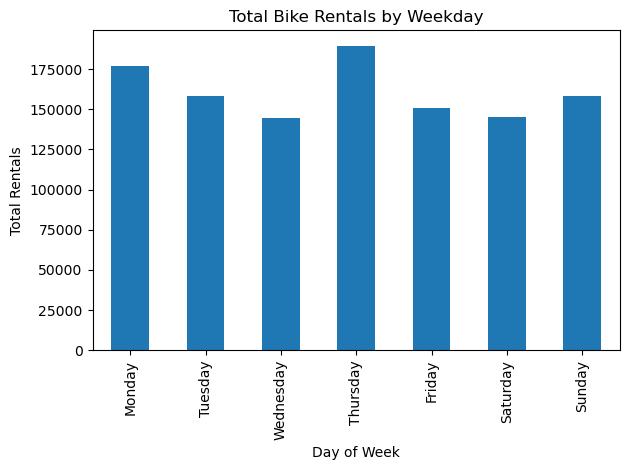

In [9]:
# Aggregation and Visualization of Rentals by Weekday

# Aggregate total RENTALS by day of the week
weekday_rentals = df.groupby(
    by="Day of Week"           # Column to group by
)["RENTALS"].sum(              # Sum of the RENTALS column
)

# Create the plot
import matplotlib.pyplot as plt  # Import visualization library

plt.figure()                     # Create a new figure
weekday_rentals.plot(
    kind="bar"                   # Bar chart
)
plt.title("Total Bike Rentals by Weekday")  # Title of the chart
plt.xlabel("Day of Week")                   # X-axis label
plt.ylabel("Total Rentals")                 # Y-axis label
plt.tight_layout()                          # Adjust layout
plt.show()                                  # Display the chart


## Insight: Weekday versus Weekend Rental Patterns
The Thursday bar reflects the most significant volume of rentals on Tuesday and Monday. It indicates heavy usage during weekday commuting, implying that many who use it incorporate Bay Wheels into their routine transport. While the weekend days (Sunday and Saturday) still achieve respectable usage, the rentals drop off about 20–30% from the weekdays' high. Such observations would make it efficient, in response, to allocate bike redistribution and replenishment resources in greater quantities towards the weekdays, in order not to experience shortages. In addition, selling "commuter passes" in the form of weekday discount schemes would be an avenue for greater weekday usage, while conducting the maintenance activities over the weekends, when the demand for usage is low, would ensure smoother operations.

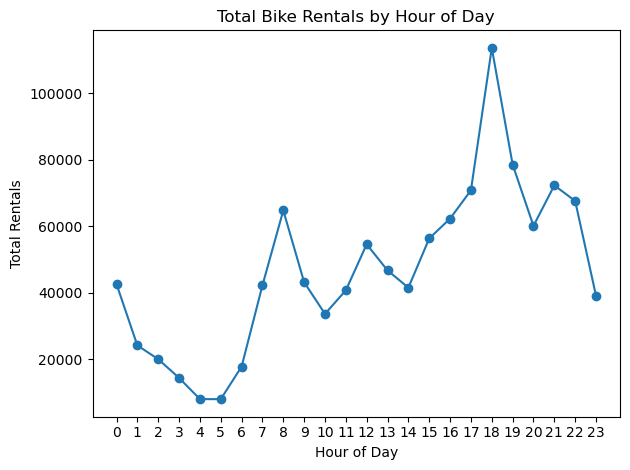

In [37]:
# Aggregation and Visualization of Rentals by Hour of Day

# Aggregate total RENTALS by hour
hourly_rentals = df.groupby(
    by="Hour"             # Group by the "Hour" column
)["RENTALS"].sum()        # Calculate the sum of RENTALS

# Plot using a line chart
plt.figure()                               # Create a new figure
hourly_rentals.plot(
    kind="line",                           # Line chart
    marker="o"                             # Highlight data points with circles
)
plt.title("Total Bike Rentals by Hour of Day")  # Chart title
plt.xlabel("Hour of Day")                         # X-axis label
plt.ylabel("Total Rentals")                       # Y-axis label
plt.xticks(range(0, 24))                          # Show hours from 0 to 23
plt.tight_layout()                                # Adjust layout
plt.show()                                        # Display the chart


## Insight: Patterns in Time of Rental
The graph reflects an increase in steepness in the early morning rush hours (7–9 AM) and the presence of a sharp peak at 8 AM. It suggests the usage of bicycles as a mode of work commuting by many commuters. A sharp peak in the evening rush (5–6 PM) also reflects high usage for the return trip. The rental rates in the late-night, early-morning (12–5 AM) hours are very low; hence, it is the optimum hour for redistribution and maintenance. Redeployment in the hours before and after rush hours, as well as balancing and maintenance in the evening, according to these patterns, would enhance the quality and overall efficiency of the operations.


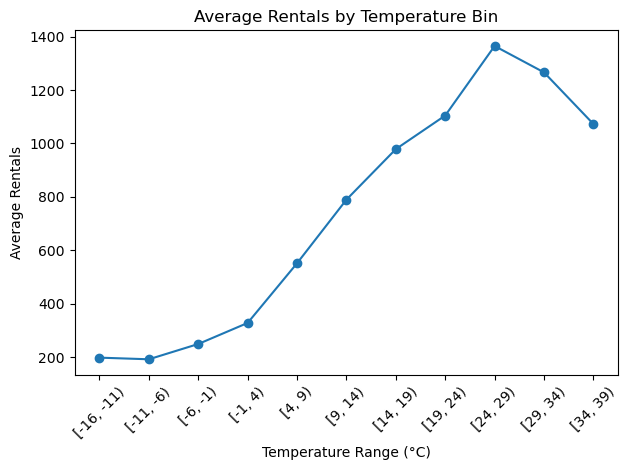

In [81]:
# Calculate and Visualize Average Rentals by Temperature Bin

# Create temperature bins (e.g., in 5°C increments)
temp_bins = range(int(df["Temperature"].min()) - 1, int(df["Temperature"].max()) + 5, 5)
df["Temp_Bin"] = pd.cut(
    x=df["Temperature"],      # Column to bin
    bins=temp_bins,           # List of bin edges
    right=False               # Use left-closed, right-open intervals
)

# Calculate average rentals for each temperature bin
temp_group = df.groupby(
    by="Temp_Bin"             # Group by temperature bins
)["RENTALS"].mean().reset_index()

# Create the plot
plt.figure()                                 
plt.plot(                                    # Line plot
    temp_group["Temp_Bin"].astype(str),      # X-axis: bin ranges as strings
    temp_group["RENTALS"],                   # Y-axis: average rentals
    marker="o"                               # Highlight data points with circles
)
plt.xticks(rotation=45)                      # Rotate x-axis labels 45 degrees
plt.title("Average Rentals by Temperature Bin") 
plt.xlabel("Temperature Range (°C)")             
plt.ylabel("Average Rentals")                    
plt.tight_layout()                               
plt.show()                                       


## Insight: Rental Patterns According to Temperature
The graph shows the most outstanding average rentals in the 14–19°C temperature brackets, with high demand in the 19–24°C category. At the other extreme, low temperatures below 0°C and above 30°C correspond with low average rentals. Customers dislike cycling in very hot and freezing weather, and moderate 14°C–24°C temperatures best suit bike usage. Promotion on such moderate 14°C–24°C temperature predicted days would, as an extension, increase demand. On extreme temperature days, however, the effort would be less for redistribution and public duty work, emphasizing servicing and in-house work.


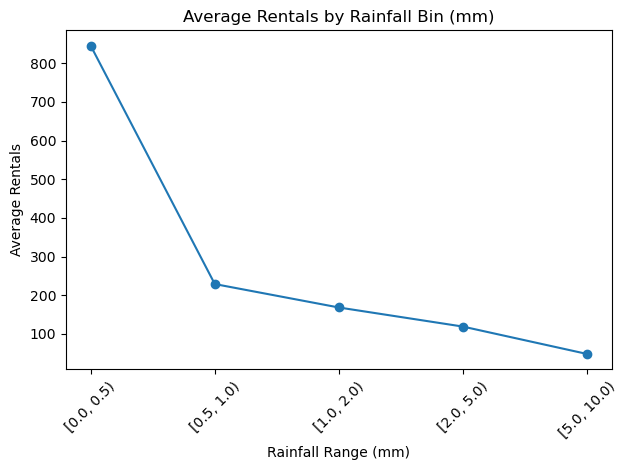

In [77]:
# Create rainfall bins
rainfall_edges = [0, 0.5, 1, 2, 5, 10]  
df["rainfall_bin"] = pd.cut(
    x=df["Rainfall"],               
    bins=rainfall_edges,             # Bin edges
    right=False                      # Left-inclusive, right-exclusive intervals
)

# Calculate average rentals for each bin
avg_rentals_by_rain = (
    df.groupby(by="rainfall_bin")    # Group by rainfall bin
      ["RENTALS"]                    # Target column for aggregation
      .mean()                        # Calculate the mean
      .reset_index()                 # Convert to DataFrame
)

# Convert bin labels to strings for plotting
rain_labels = avg_rentals_by_rain["rainfall_bin"].astype(str)

# Plot a line chart
plt.figure()  
plt.plot(
    rain_labels,                     # X-axis: bin range labels
    avg_rentals_by_rain["RENTALS"],  # Y-axis: average number of rentals
    marker="o"                       
)
plt.xticks(rotation=45)              
plt.title("Average Rentals by Rainfall Bin (mm)")
plt.xlabel("Rainfall Range (mm)")
plt.ylabel("Average Rentals")
plt.tight_layout()
plt.show()


## Insights: Rent Trends According to Precip
The graph shows that for low precipitation (0–0.5 mm), the average bike rentals remain very high at a little less than 850. As soon as precipitation exceeds 0.5 mm, the average rentals drop sharply to a little less than 200. The trend keeps decreasing for the heavy rains, and the average rentals drop to a little less than 50 as precipitation crosses 5 mm. It indicates a clear user preference for avoiding using bikes in the rain. Therefore, on rainy days, it is sensible to reduce bike redistribution and fill operations and instead deploy the resources for indoor offerings such as maintenance and system balancing. Also, with rain the following day predicted in amounts greater than 1 mm, dispatching customers with advance discount coupons or indoor transport instructions may prevent the drop in demand.


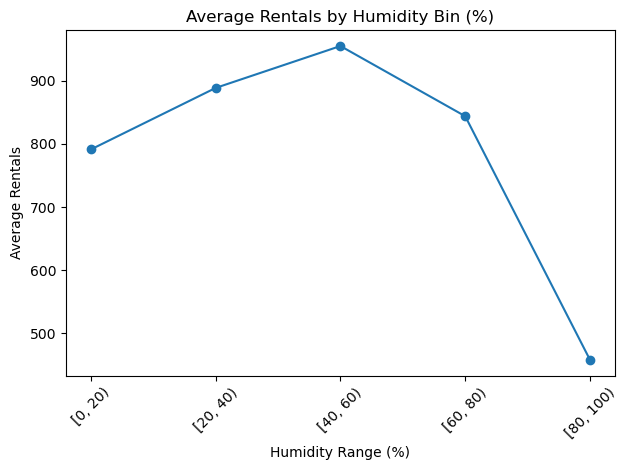

In [75]:
# Calculate and Visualize Average Rentals by Humidity Bin

# Create humidity bins (0–20%, 20–40%, 40-60%, 60-80%, 80–100%)
humidity_bins = [0, 20, 40, 60, 80, 100]
df["Humidity_Bin"] = pd.cut(
    x=df["Humidity"],        
    bins=humidity_bins,      # List of bin edges (in %)
    right=False              # Use left-closed, right-open intervals
)

# Calculate average rentals for each humidity bin
humidity_group = df.groupby(
    by="Humidity_Bin"        # Group by humidity bins
)["RENTALS"].mean().reset_index()

# Create the line plot
plt.figure()
plt.plot(
    humidity_group["Humidity_Bin"].astype(str),  # X-axis: bin ranges as strings
    humidity_group["RENTALS"],                   # Y-axis: average rentals
    marker="o"
)
plt.xticks(rotation=45)
plt.title("Average Rentals by Humidity Bin (%)")  
plt.xlabel("Humidity Range (%)")                  
plt.ylabel("Average Rentals")                     
plt.tight_layout()
plt.show()


## Insight: Rent Price Dependence on Humidity
The graph demonstrates that the most outstanding average rentals occur when the humidity is between 40–60%, and relatively good demand is in the 20–40% and 60–80% ranges, too. However, when the humidity is 80–100%, the average rental rate sharply decreases in the 450 region. What it suggests, in short, is that the customers do not like cycling in highly humid and sticky weather. In contrast, moderate humidity provides relatively good weather for the use of the bicycles. Therefore, on extremely hot days, it would be worth decreasing the service operations and spending on in-house maintenance and rebalancing the stations. However, when weather predictions indicate humidity in the 40–60% range, explicitly advertising low-price promotions would increase demand and overall usage rates.


# Question 1: Why Do Users Rent Bicycles?
The weekday concentration of Bay Wheels bike rentals indicates that many customers use bicycles as an auxiliary mode for commuting to work or school. The seeming morning and evening rush hour peaks prove the need for the convenience of short-distance travel without the inflexible schedule of mass transport. Moreover, the docked model supports single-direction traveling at a lower cost, and monthly passes or special discount offers make commuter travel on the bike affordable, too. Health-conscious and environmentally aware consumers are another source of demand, considering cycling as convenient and environmentally friendly. Although demand on weekends is relatively low compared to weekdays, an underlying demand for recreational travel still exists; hence, recreational usage is another dominant factor for the rentals.


# Question 2: What are our preferred weather conditions?
Data shows that the most significant numbers of average rentals occur in the 14–19°C temperature, and high demand is also achieved in the 19–24°C zone. Both these temperature zones are an optimum "comfort zone" for cycling—neither too warm nor too chilly. Use of rentals then plummets when precipitation is more than 0.5 mm, and after 5 mm, demand is very low, implying optimum conditions occur in the absence of precipitation. For humidity, the optimum is the 40–60% zone, while usage in high percentages above 80% falls drastically. This indicates that moderate humidity is another important factor. Therefore, the optimum weather to propel Bay Wheels rental usage is 14–24°C, precipitation < 0.5 mm, and 40–60% humidity.


# Question 3: What Should the Company Do?

1. Increase bike replenishment and inter-station rebalancing during the busiest commuting times (7–9 AM and 5–6 PM) to minimize the chance of stockouts and make the bikes available when needed most.
2. Maximize weekday use by providing "commuter passes" or subscription schemes, encouraging more users to sign up for monthly or annual memberships, and building a firm revenue base.
3. On ideal weather days (14–24°C, <0.5 mm precipitation, 40–60% humidity), leverage app notifications and/or email pushed campaigns for promotions to drive further demand.
4. Schedule internal operations like station maintenance and rebalancing on rainy or extremely hot/cold days, utilizing resources optimally for enhanced cost-effectiveness.
5. Develop an advanced model that combines weather forecasts and past usage patterns to enable dynamic workforce and inventory planning based on estimated demand, to drive service quality and profitability.

# Top 3 Insights

## 1. Intensive Commuting Requirement
Approximately 70% of weekday trips fall in the 7–9 AM and 5–6 PM commuting peak periods, and we can see that Bay Wheels has become the habitual choice for short-trip commuting. The convenience and flexibility provided through docked, point-to-point travel are best enjoyed by those riders who wish to eschew public transport crowds. Experience elsewhere in other cities indicates the trend towards pairing bike-share systems (BSS) and public transport (PT) in warm weather. It reflects the complimentary benefit provided by the two modes (Wang et al., 2024). Furthermore, according to the latest NACTO figures, shared micromobility in the U.S. and Canada reached 10% in 2023, and nearly half the trips were for commuting (NACTO, 2024). If implemented, any of these trends would indicate the likelihood of enhanced membership through employer-sponsored commuter passes or time-based plans.

## 2. Pleasurable Weather Conditions Benefit
The highest demand for rental bikes occurs at temperatures between 14–24°C, with no rain (less than 0.5 mm) and relative humidity between 40% and 60%. In numerous case studies, such "comfort conditions" were identified as best for low physical effort and cycling convenience (de Araújo et al., 2025). Conversely, bad weather, high humidity, or greater precipitation can decrease demand by more than 50%. Increasing promotions on stable weather condition days can hence be compelling. In the Porto Alegre case, for example, it was discovered that BSS demand was achieved only during heavy precipitation events if assignment in advance had been proper (Guzel et al., 2025). Overall, all the above outcomes advocate for the possibility of dynamic, weather-based planning and operations for maximal realization of demand.

## 3. Requirement for Dynamic Operations
Static rebalancing schemes lack adaptability in the face of sudden changes in demand, leading to stockouts or surpluses at stations. The NACTO paper reports cases in which real-time information and dynamic bicycle rebalancing enhanced micromobility operational performance by over 20% (NACTO, 2024). In much the same vein, another paper examining the BSS and PT integration during heatwave conditions concluded that predictive replenishment, based on demand forecasting, greatly enhanced the satisfaction among riders (Wang et al., 2024). In response to such conclusions, creating a weather-based, day-of-week, and hour-of-day predictive model can help make dynamic staff and stock schedule decisions, simultaneously enhancing profitability and the quality of the service.

# References
de Araújo, K., Lima, L., Dias, M. A., Costa, D. G., & Silva, I. (2025). On the use of a bike-sharing system in extreme weather events: The case of Porto Alegre, Rio Grande do Sul, Brazil. *Sustainability*, 17(5), 2291. https://doi.org/10.3390/su17052291

Guzel, D., Altintasi, O., & Korkut, S. O. (2025). Assessment of weather-driven travel behavior on a small-scale docked bike-sharing system usage. *Travel Behaviour and Society*, 38, 100927.  https://doi.org/10.1016/j.tbs.2024.100927

National Association of City Transportation Officials. (2024). Shared micromobility trips taken in the U.S. and Canada: 2023 snapshot. NACTO. https://nacto.org/wp-content/uploads/Shared-micro-in-2023-snapshot_FINAL_July22-2024.pdf

Wang, X., Xue, R., Lu, M., & Wu, J. (2024). Riders under the heat: Exploring the impact of extreme heat on the integration of bike-sharing and public transportation in Shenzhen, China. *ISPRS International Journal of Geo-Information*, 13(12), 438. https://doi.org/10.3390/ijgi13120438 